In [1]:
import os
import pandas as pd
import numpy as np
import datetime

import pycaret
from pycaret.classification import *

In [2]:
data = pd.read_csv('../src/data/final_data/final_data.csv')

In [3]:
train_size = 0.8
session_id = 2022
target = 'State'
experiment_name='predictive_maintenance'

In [4]:
timer = datetime.datetime.now()
experiment = setup(data=data, target=target, session_id=session_id, train_size=train_size, log_experiment = True, experiment_name=experiment_name, fold_shuffle=True, ignore_features=['unit_number', 'RUL', 'cycles'], ignore_low_variance=False, normalize=True)

,Description,Value
0,session_id,2022
1,Target,State
2,Target Type,Multiclass
3,Label Encoded,"Attention required: 0, Brand new: 1, Healthy: 2, Mature: 3"
4,Original Data,"(20631, 102)"
5,Missing Values,0
6,Numeric Features,93
7,Categorical Features,5
8,Ordinal Features,0
9,High Cardinality Features,0


In [5]:
fold = 15

In [6]:
best_model = compare_models(sort='F1', fold=fold)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9789,0.9994,0.9789,0.9790,0.9789,0.9719,0.9719,0.6053
xgboost,Extreme Gradient Boosting,0.9778,0.9992,0.9778,0.9779,0.9778,0.9704,0.9705,7.1047
lightgbm,Light Gradient Boosting Machine,0.9776,0.9991,0.9775,0.9777,0.9776,0.9701,0.9701,1.1980
rf,Random Forest Classifier,0.9763,0.9992,0.9762,0.9764,0.9763,0.9684,0.9684,0.8553
catboost,CatBoost Classifier,0.9728,0.9988,0.9727,0.9729,0.9728,0.9637,0.9638,18.0587
dt,Decision Tree Classifier,0.9387,0.9592,0.9387,0.9389,0.9387,0.9183,0.9184,0.1433
knn,K Neighbors Classifier,0.9359,0.9913,0.9356,0.9363,0.9360,0.9145,0.9146,0.8373
gbc,Gradient Boosting Classifier,0.8971,0.9842,0.8967,0.8989,0.8976,0.8627,0.8630,10.8940
lr,Logistic Regression,0.7326,0.9212,0.7310,0.7323,0.7318,0.6434,0.6437,2.3287
lda,Linear Discriminant Analysis,0.6838,0.9021,0.6825,0.7014,0.6878,0.5784,0.5813,0.1053


In [7]:
model = create_model('lightgbm', fold=fold)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9773,0.9992,0.9772,0.9774,0.9773,0.9697,0.9697
1,0.9746,0.9987,0.9746,0.9746,0.9746,0.9661,0.9661
2,0.9846,0.9996,0.9845,0.9846,0.9846,0.9794,0.9794
3,0.9791,0.9992,0.9790,0.9791,0.9791,0.9721,0.9721
4,0.9755,0.9990,0.9754,0.9757,0.9755,0.9673,0.9673
5,0.9791,0.9991,0.9791,0.9792,0.9791,0.9721,0.9722
6,0.9764,0.9992,0.9764,0.9769,0.9764,0.9685,0.9686
7,0.9745,0.9993,0.9744,0.9745,0.9745,0.9661,0.9661
8,0.9818,0.9993,0.9818,0.9819,0.9818,0.9758,0.9758
9,0.9736,0.9991,0.9735,0.9736,0.9736,0.9648,0.9648


In [8]:
tunned_model = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9740,0.9990,0.9739,0.9741,0.9740,0.9653,0.9653
1,0.9782,0.9988,0.9782,0.9784,0.9782,0.9709,0.9710
2,0.9667,0.9986,0.9666,0.9667,0.9667,0.9556,0.9556
3,0.9637,0.9984,0.9635,0.9637,0.9637,0.9515,0.9515
4,0.9709,0.9988,0.9709,0.9713,0.9710,0.9612,0.9613
5,0.9727,0.9990,0.9727,0.9728,0.9727,0.9636,0.9637
6,0.9703,0.9990,0.9702,0.9703,0.9703,0.9604,0.9604
7,0.9745,0.9988,0.9745,0.9748,0.9746,0.9661,0.9661
8,0.9709,0.9982,0.9708,0.9711,0.9710,0.9612,0.9612
9,0.9739,0.9987,0.9739,0.9740,0.9740,0.9653,0.9653


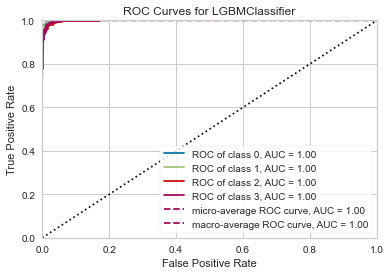

In [9]:
plot_model(tunned_model, plot = 'auc')

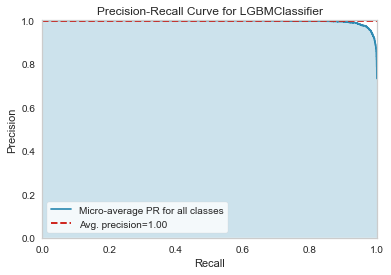

In [10]:
plot_model(tunned_model, plot = 'pr')

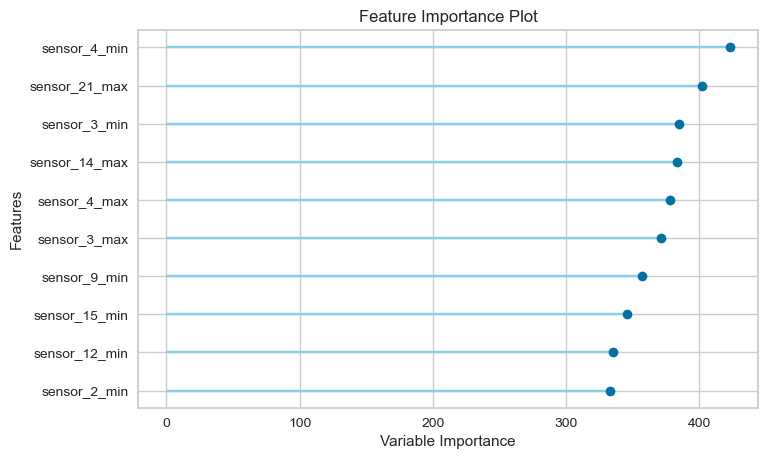

In [11]:
plot_model(tunned_model, plot='feature')

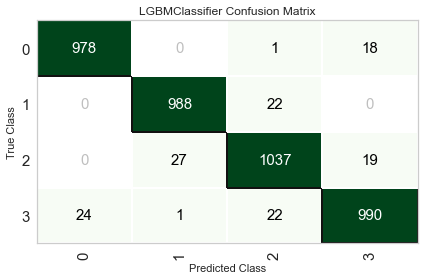

In [12]:
plot_model(tunned_model, plot = 'confusion_matrix')

In [13]:
save_model(tunned_model, f'../src/models/{timer.day}_{timer.month}_{timer.year}__{timer.hour}{timer.minute}{timer.second}')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['unit_number', 'RUL',
                                                        'cycles'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='State',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_n...
                                 colsample_bytree=1.0, feature_fraction=1.0,
                                 importance_type='split', learning_rate=0.123,
                                 max_depth=-1, min_chil